<a href="https://colab.research.google.com/github/MariaAkterKhadiza/PHITRON_AI-ML-B1/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

Mariya Dewan
Email:khadizatulmaria2002@gmail.com

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#if i need any library function then I call it at that time by my need


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
df=pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [ ]:
# TODO: Perform EDA
df.shape

(1338, 7)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

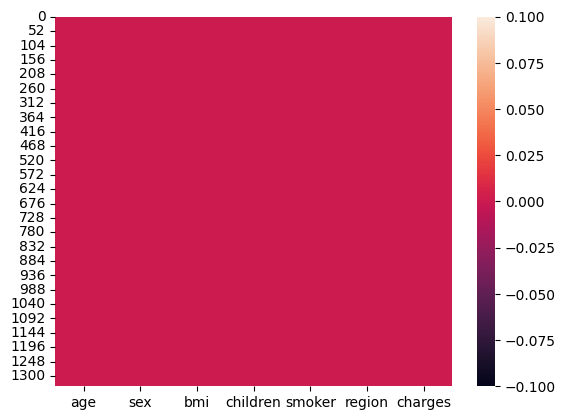

In [ ]:
sns.heatmap(df.isnull())#there is no null value

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
#target column and numerical columns  and categorical columns
target='charges'
num=['age', 'bmi', 'children']
cat=['sex', 'smoker', 'region']

In [ ]:
print("numerical columns :",num)
print("categorical columns is :",cat)
print("Target columns is :",target)

numerical columns : ['age', 'bmi', 'children']
categorical columns is : ['sex', 'smoker', 'region']
Target columns is : charges


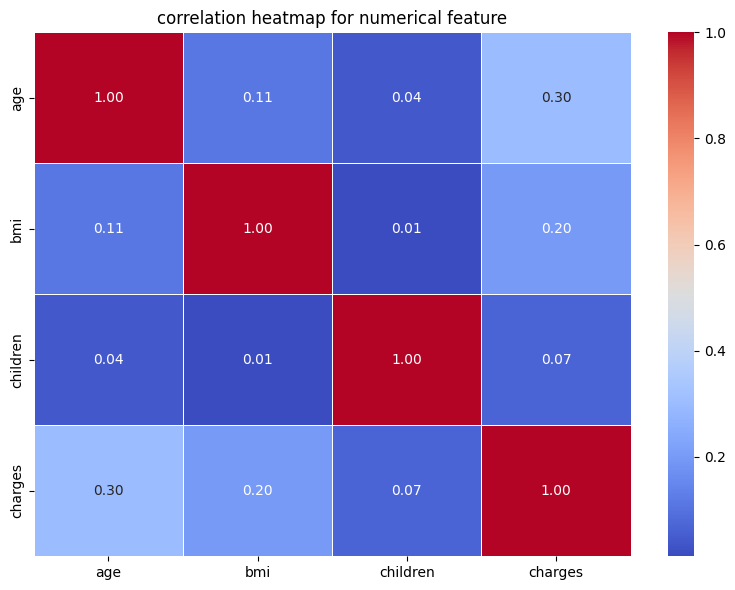

In [ ]:
#corelation matrix show with the target col and the numerical col
corr_metrix=df[num+[target]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("correlation heatmap for numerical feature")
plt.tight_layout()
plt.show()

In [ ]:
#see the value in a catagorical columns
for c in cat:
  print(c,df[c].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


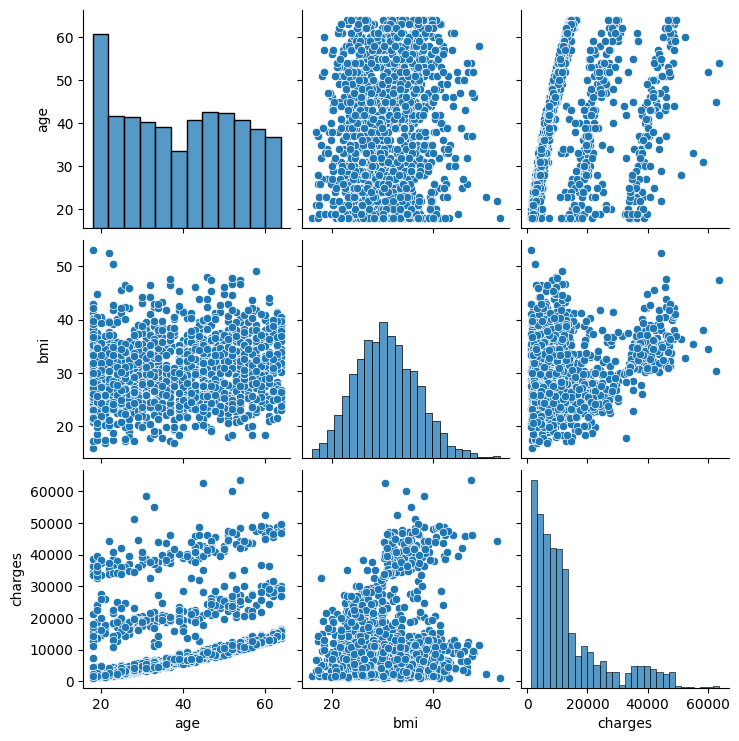

In [ ]:
sns.pairplot(df[['age', 'bmi', 'charges']], diag_kind='hist')

#relation age and bmi in numerical column with target column charges


In [ ]:
#encoding the columns feature  which is categorical we do lebel encoding and one hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.head(10)
df['smoker']=le.fit_transform(df['smoker'])
df.head(10)
ord=OrdinalEncoder()
df['region']=ord.fit_transform(df[['region']])
df.head(10)



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3.0,16884.92400
1,18,1,33.770,1,0,2.0,1725.55230
2,28,1,33.000,3,0,2.0,4449.46200
3,33,1,22.705,0,0,1.0,21984.47061
4,32,1,28.880,0,0,1.0,3866.85520
5,31,0,25.740,0,0,2.0,3756.62160
6,46,0,33.440,1,0,2.0,8240.58960
7,37,0,27.740,3,0,1.0,7281.50560
8,37,1,29.830,2,0,0.0,6406.41070
9,60,0,25.840,0,0,1.0,28923.13692


## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3.0,16884.92400
1,18,1,33.770,1,0,2.0,1725.55230
2,28,1,33.000,3,0,2.0,4449.46200
3,33,1,22.705,0,0,1.0,21984.47061
4,32,1,28.880,0,0,1.0,3866.85520


In [ ]:
#train test split in this method
x=df.drop('charges',axis=1)
y=df['charges']
print(x.shape)
print(y.shape)


(1338, 6)
(1338,)


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)


(1070, 6)
(268, 6)


In [ ]:
# TODO: Prepare features


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
print("model fitted successfully")

y_pred=lin_reg.predict(x_test)


model fitted successfully


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 4186.508898366433
MSE : 33635210.431178406
RMSE : 5799.587091438356
R2 : 0.7833463107364539


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
degree=2
poly_all_model=Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree,include_bias=False)),
        ('lin_reg',LinearRegression())
    ]
)
poly_all_model.fit(x_train,y_train)
y_pred_poly=poly_all_model.predict(x_test)


In [ ]:
#see accuracy of all polynomial regression
mae=mean_absolute_error(y_test,y_pred_poly)
mse=mean_squared_error(y_test,y_pred_poly)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_poly)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 2730.3155816804506
MSE : 20530608.942951977
RMSE : 4531.07150053406
R2 : 0.8677566718537737


Here the polynomial regression

value is more(0.86) than

multiple linear regression (0.78)



## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression
svr=SVR(kernel='rbf',C=0.1,epsilon=0.1,gamma='scale')
svr.fit(x_train,y_train)
y_pred_svr=svr.predict(x_test)


In [ ]:
mae=mean_absolute_error(y_test,y_pred_svr)
mse=mean_squared_error(y_test,y_pred_svr)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_svr)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 8637.061667603704
MSE : 166730926.6378486
RMSE : 12912.433025493243
R2 : -0.07395999333291514


r2 is negative  so in this model

SVR is not fit the model because

its accuracy is -0.07 which is

too low

in this model we chose rbf kernel

because The RBF kernel is a

non-linear kernel that maps data

into a higher-dimensional space,

allowing the model to learn

complex or curved decision boundaries.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
# TODO: Random Forest Regressor
ran_reg= RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10,
    n_jobs=-1
)

ran_reg.fit(x_train,y_train)
y_pred_ran=ran_reg.predict(x_test)


In [ ]:
#accuracy matrix
mae=mean_absolute_error(y_test,y_pred_ran)
mse=mean_squared_error(y_test,y_pred_ran)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_ran)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 2486.342357761746
MSE : 20818264.78473688
RMSE : 4562.703670493722
R2 : 0.8659038010507673


this give good prediction but error is too high

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [ ]:
# TODO: Load classification dataset
df_loan=pd.read_csv("loan.csv")
df_loan.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [ ]:
print("description \n :",df_loan.describe().T)
print(" ")



description 
 :                               count          mean           std      min  \
person_age                  45000.0     27.764178      6.045108    20.00   
person_income               45000.0  80319.053222  80422.498632  8000.00   
person_emp_exp              45000.0      5.410333      6.063532     0.00   
loan_amnt                   45000.0   9583.157556   6314.886691   500.00   
loan_int_rate               45000.0     11.006606      2.978808     5.42   
loan_percent_income         45000.0      0.139725      0.087212     0.00   
cb_person_cred_hist_length  45000.0      5.867489      3.879702     2.00   
credit_score                45000.0    632.608756     50.435865   390.00   
loan_status                 45000.0      0.222222      0.415744     0.00   

                                 25%       50%       75%         max  
person_age                     24.00     26.00     30.00      144.00  
person_income               47204.00  67048.00  95789.25  7200766.00  
person_emp

In [ ]:
print("All about the data set :\n",df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<Axes: >

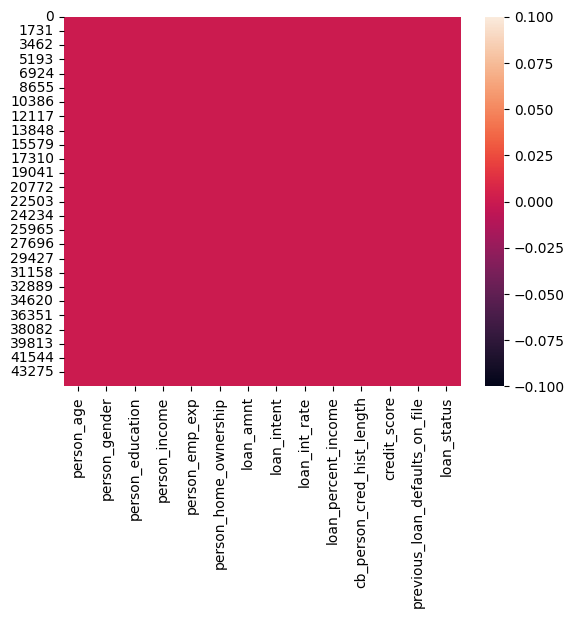

In [ ]:
sns.heatmap(df_loan.isnull())#here thereis no null value  in this data set

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


In [ ]:
# TODO: Classification EDA
df_loan.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df_loan.select_dtypes(include=['int64','float64']).columns#all numerical columns are here

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

In [ ]:
df_loan.select_dtypes(include=['object']).columns#all catagorical columns are here

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
tar='loan_status'
numerical=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score',]

numerical

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [ ]:
categorical=['person_gender','person_education','person_home_ownership',
       'loan_intent','previous_loan_defaults_on_file']

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [ ]:
df_loan.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [ ]:
# TODO: Prepare classification features
for c in categorical:
  print(c,df_loan[c].unique())

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file ['No' 'Yes']


In [ ]:
le=LabelEncoder()
df_loan['person_gender']=le.fit_transform(df_loan['person_gender'])

df_loan['previous_loan_defaults_on_file']=le.fit_transform(df_loan['previous_loan_defaults_on_file'])
df.head(10)
ord=OrdinalEncoder()
df_loan['person_education']=ord.fit_transform(df_loan[['person_education']])
df_loan['person_home_ownership']=ord.fit_transform(df_loan[['person_home_ownership']])
df_loan['loan_intent']=ord.fit_transform(df_loan[['loan_intent']])
df_loan.head(5)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4.0,71948.0,0,3.0,35000.0,4.0,16.02,0.49,3.0,561,0,1
1,21.0,0,3.0,12282.0,0,2.0,1000.0,1.0,11.14,0.08,2.0,504,1,0
2,25.0,0,3.0,12438.0,3,0.0,5500.0,3.0,12.87,0.44,3.0,635,0,1
3,23.0,0,1.0,79753.0,0,3.0,35000.0,3.0,15.23,0.44,2.0,675,0,1
4,24.0,1,4.0,66135.0,1,3.0,35000.0,3.0,14.27,0.53,4.0,586,0,1


In [ ]:
#train test split
x2=df_loan.drop('loan_status',axis=1)
y2=df_loan['loan_status']
x2.shape

(45000, 13)

In [ ]:
y2.shape

(45000,)

In [ ]:
#train test split
x2_train,y2_train,x2_test,y2_test=train_test_split(x2,y2,test_size=0.20,random_state=42,stratify=y2)
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(36000, 13)
(9000, 13)
(36000,)
(9000,)


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x2 = df_loan.drop('loan_status', axis=1)
y2 = df_loan['loan_status']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=42, stratify=y2)

scale = StandardScaler()
x2_train_scaled = scale.fit_transform(x2_train)
x2_test_scaled = scale.transform(x2_test)

model = LogisticRegression()
model.fit(x2_train_scaled, y2_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [ ]:
y2_pred=model.predict(x2_test_scaled)

print("Test accuracy :",accuracy_score(y2_test,y2_pred) )

Test accuracy : 0.8967777777777778


In [ ]:
# confusion matrix

cm=confusion_matrix(y2_test,y2_pred)

print("Confusion metrix :\n ",cm)

print("Classification report :\n",classification_report(y2_test,y2_pred))

Confusion metrix :
  [[6572  428]
 [ 501 1499]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.78      0.75      0.76      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [ ]:
# TODO: SVM Classification
svm=SVC(kernel='rbf',C=0.1,random_state=42)
svm.fit(x2_train_scaled,y2_train)
y2_pred_svm=svm.predict(x2_test_scaled)

In [ ]:
print("Test accuracy :",accuracy_score(y2_test,y2_pred_svm))

Test accuracy : 0.9057777777777778


In [ ]:
# confusion matrix

cm=confusion_matrix(y2_test,y2_pred_svm)

print("Confusion metrix :\n ",cm)

print("Classification report :\n",classification_report(y2_test,y2_pred_svm))

Confusion metrix :
  [[6680  320]
 [ 528 1472]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7000
           1       0.82      0.74      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.87      0.85      0.86      9000
weighted avg       0.90      0.91      0.90      9000



## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [ ]:
# TODO: Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x2_train,y2_train)
y2_pred_gnb=gnb.predict(x2_test)

print("Test accuracy :",accuracy_score(y2_test,y2_pred_gnb))



Test accuracy : 0.8118888888888889


In [ ]:
# confusion matrix

cm=confusion_matrix(y2_test,y2_pred_gnb)

print("Confusion metrix :\n ",cm)

print("Classification report :\n",classification_report(y2_test,y2_pred_gnb))

Confusion metrix :
  [[6717  283]
 [1410  590]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7000
           1       0.68      0.29      0.41      2000

    accuracy                           0.81      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [ ]:
# TODO: KNN

from sklearn.neighbors import KNeighborsClassifier
k=range(1,20)
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)

    knn.fit(x2_train_scaled,y2_train)
    y_pred_knn=knn.predict(x2_test_scaled)
    print(accuracy_score(y2_test,y_pred_knn))


0.8681111111111111
0.8767777777777778
0.8838888888888888
0.8875555555555555
0.8952222222222223
0.8911111111111111
0.8961111111111111
0.8953333333333333
0.8982222222222223
0.8976666666666666
0.8984444444444445
0.8968888888888888
0.8983333333333333
0.8984444444444445
0.8982222222222223
0.897
0.8991111111111111
0.8984444444444445
0.9004444444444445


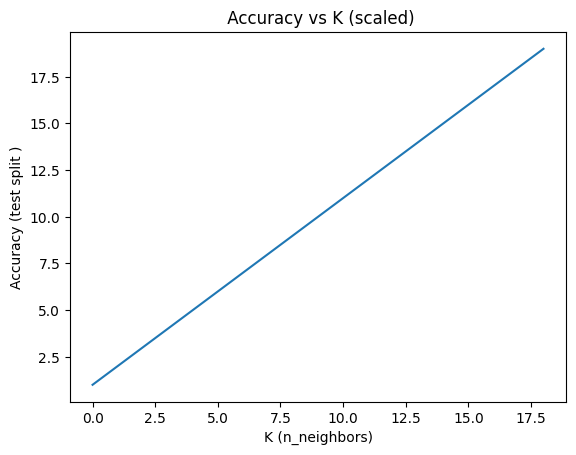

In [ ]:
plt.figure()
plt.plot(list(k))
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (test split )")
plt.title(" Accuracy vs K (scaled)")
plt.show()



## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(x2_train,y2_train)
y_pred_rf=rf.predict(x2_test)
print("test accuracy ;",accuracy_score(y2_test,y_pred_rf))


test accuracy ; 0.9276666666666666


In [ ]:
# confusion matrix

cm=confusion_matrix(y2_test,y_pred_rf)

print("Confusion metrix :\n ",cm)

print("Classification report :\n",classification_report(y2_test,y_pred_rf))

Confusion metrix :
  [[6805  195]
 [ 456 1544]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
importance = pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_
).sort_values(ascending=False)

importance.head(10)

,0
previous_loan_defaults_on_file,0.220677
loan_percent_income,0.162804
loan_int_rate,0.160318
person_income,0.129435
person_home_ownership,0.066664
loan_amnt,0.060769
credit_score,0.056137
loan_intent,0.035536
person_age,0.030057
person_emp_exp,0.027044


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
here best  regression model is polynomial regression nad support vector regression becuasue in a polynomial regression it convert its feature drgree for better understandable the feature and well learn

in  Random tree regressor it also give  beter accuracy  0.86

so this two model is perfect for the regression


2.the best classification model is Random forest  which is 0.92 .We know that random forest work like vast version of decision which prediction is well by the majority voting the tree so random forest is better for classification


3
. in medical sector we can use this model for deases classification we input the patient data then it predict that the patient  is well or not in genetic enginnering we can also this classification model to discover new things like protein structure